## CBA / DMG2 / Supervised Learning Homework Assignment - 1


Submitted By: <b>Amit Kumar Sharma (PGID: 71721079)<b>

### Problem 5 – MNSIT - KNN/Parzen Window

    •	Take the MNIST dataset. Lets call it D0 dataset
    •	Take the two datasets D1 and D2 from P4.
    •	Build k-Nearest neighbors classifier with:
        ¤ K = 1, 3, 5, 7, 9, 11, 13, 15, 17
        ¤ Plot training and test accuracy with these values of k on x axis
    •	Build Parzen window classifier with:
        ¤ Sigma = 0.1, 0.2, 0.3, …, 3.0
        ¤ Plot training and test accuracies with these values of sigma.
    •	Do both on D1 and D2 datasets.
    •	Comment on the optimal k and optimal sigma and compare  those classifiers across D1 and D2 and see 
        which one has highest test accuracy.

In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import naive_bayes
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/train'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = i
    if i == 0:
        train = temp
    else:
        train = pd.concat([train, temp],ignore_index=True)

In [3]:
test = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/test'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = i
    if i == 0:
        test = temp
    else:
        test = pd.concat([test, temp],ignore_index=True)

In [4]:
train.apply(lambda x: sum(x.isnull()))

V1       391
V2       391
V3       391
V4       391
V5       391
V6       391
V7       391
V8       391
V9       391
V10      391
V11      391
V12      391
V13      391
V14      391
V15      391
V16      391
V17      391
V18      391
V19      391
V20      391
V21      391
V22      391
V23      391
V24      391
V25      391
V26      391
V27      391
V28      391
V29      391
V30      391
        ... 
V756     391
V757     391
V758     391
V759     391
V760     391
V761     391
V762     391
V763     391
V764     391
V765     391
V766     391
V767     391
V768     391
V769     391
V770     391
V771     391
V772     391
V773     391
V774     391
V775     391
V776     391
V777     391
V778     391
V779     391
V780     391
V781     391
V782     391
V783     391
V784     391
label      0
Length: 785, dtype: int64

In [5]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35750 entries, 0 to 36140
Columns: 785 entries, V1 to label
dtypes: float64(784), int64(1)
memory usage: 214.4 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24250 entries, 0 to 24518
Columns: 785 entries, V1 to label
dtypes: float64(784), int64(1)
memory usage: 145.4 MB


In [8]:
train.iloc[:,0:784].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train = train.iloc[:,0:784]/255.0
y_train = train["label"]

X_test = test.iloc[:,0:784]/255.0
y_test = test["label"]

In [10]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### PCA

In [11]:
## Set the seed
np.random.seed(1234)

## Generate 9 Principle Components
pca = PCA(n_components = 9)
pca.fit(X_train)
print(pca.explained_variance_)
print('Explained variation per principal component: {0}'.format(pca.explained_variance_ratio_))
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))

col_names = [ 'pca'+str(i) for i in range(0,9) ]
digit_pca_9 = pd.DataFrame(pca.transform(X_train), columns = col_names)

Y = pd.DataFrame(np.array(y_train), columns=["label"])

d1 = pd.concat([digit_pca_9, Y], axis=1)

print("The dimensions of PCA projection Data Frame: {0}".format(digit_pca_9.shape))

d1.head(10)

[5.10335982 3.74717042 3.23910925 2.83450361 2.57223319 2.26820366
 1.72876292 1.51358699 1.44555369]
Explained variation per principal component: [0.09694147 0.07117981 0.06152888 0.05384314 0.04886116 0.04308593
 0.03283892 0.02875152 0.02745918]
Explained cumulative variation for 2 principal components: [0.09694147 0.16812128 0.22965016 0.2834933  0.33235446 0.37544039
 0.4082793  0.43703082 0.46449001]
The dimensions of PCA projection Data Frame: (35750, 9)


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,label
0,4.028728,-1.062822,2.442987,-1.830775,-3.152218,-0.620715,-0.152372,-0.399007,0.213673,0
1,4.122160,-1.303177,2.160442,-2.171781,-3.408331,0.089392,-0.173005,0.207913,1.964713,0
2,2.412930,-0.853290,2.724968,-2.498519,1.573210,-1.656461,0.004307,1.988436,0.456747,0
3,6.532352,-0.329908,-0.559258,-3.094260,-2.990228,1.832665,-0.603947,-1.599748,1.226512,0
4,5.162878,0.045781,-1.127272,-1.032655,-2.616755,2.245742,1.285621,-2.519399,1.953335,0
5,4.828110,-0.635625,-0.698679,-2.246634,1.644010,-1.638070,0.584425,0.952081,0.928532,0
6,3.342471,-1.600990,0.796915,-3.047240,-0.912178,-0.780914,-0.960354,1.927253,1.115426,0
7,4.219502,-0.822439,1.583716,-3.512004,-0.030552,-1.995429,-0.691501,1.047912,-0.413527,0
8,4.595544,-1.395223,-2.461960,0.507267,-2.793008,2.513274,0.632571,-1.514705,0.039801,0
9,5.399449,0.019286,-0.060062,-1.375413,-4.335054,0.696019,1.522625,-1.521426,2.403929,0


##### LDA

In [12]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
d2 = lda.fit_transform(X_train, y_train)
col_names = [ 'lda'+str(i) for i in range(0,9) ]
digit_lda_9 = pd.DataFrame(d2, columns = col_names)

Y = pd.DataFrame(np.array(y_train), columns=["label"])

d2 = pd.concat([digit_lda_9, Y], axis=1)
d2.head(10)

/Users/a5sharma/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/a5sharma/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,lda0,lda1,lda2,lda3,lda4,lda5,lda6,lda7,lda8,label
0,-2.887029,-3.310528,-2.786562,0.058788,-3.018495,-0.674304,0.506955,-0.842984,-0.173764,0
1,-1.894420,-2.425312,-3.999679,-0.175208,-2.729570,-1.044016,1.235900,0.358109,-0.262772,0
2,-2.860135,-0.965014,-0.857678,-0.730400,-0.502527,0.296998,-1.284739,-1.513364,1.468125,0
3,-2.865351,-2.825316,-4.989777,0.231808,-0.884555,-1.196797,-0.355758,-0.332597,0.916868,0
4,-3.586286,-4.069599,-4.047539,-0.915669,-2.696322,-1.525039,-1.641412,-0.083102,-0.023521,0
5,-3.456195,-2.977401,-2.439679,-0.070588,0.010821,0.594510,-0.426037,-1.286878,1.460801,0
6,-2.362356,-1.329942,-3.998065,-0.273734,-1.020206,0.205699,1.455731,-1.140298,0.955281,0
7,-3.368090,-2.663745,-2.640072,-0.351479,-0.496984,0.606974,-0.583543,-0.090488,0.335246,0
8,-2.794333,-2.440993,-4.080267,0.533639,-2.163575,-1.261034,0.077082,-1.212496,0.325180,0
9,-3.801034,-4.642088,-3.061066,-0.319711,-3.782619,-1.189575,0.343004,-1.708295,0.630156,0


### KNN

Build k-Nearest neighbors classifier with:<br>
¤ K = 1, 3, 5, 7, 9, 11, 13, 15, 17<br>
¤ Plot training and test accuracy with these values of k on x axis


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

###### Build KNN model for PCA transformed dataset 

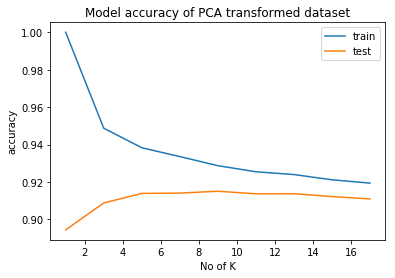

In [14]:
X_train = d1.iloc[:,0:9]
y_train = d1.label

X_test = test.iloc[:,0:784]/255.0
y_test = test["label"]

col_names = [ 'pca'+str(i) for i in range(0,9) ]
X_test = pd.DataFrame(pca.transform(X_test), columns = col_names)

train_accuracy = list()
test_accuracy = list()
noOfK = list()
for i in range(1, 19, 2):
    mod = KNeighborsClassifier(n_neighbors=i)
    mod.fit(X_train, y_train)
    y_train_pred = mod.predict(X_train)
    y_test_pred = mod.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_true=y_train,y_pred=y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_true=y_test,y_pred=y_test_pred))
    noOfK.append(i)
    
PCAKnnDf = pd.DataFrame({'K':noOfK,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
       
plt.plot(PCAKnnDf['K'],PCAKnnDf['train_accuracy'])
plt.plot(PCAKnnDf['K'],PCAKnnDf['test_accuracy'])
plt.title('Model accuracy of PCA transformed dataset')
plt.ylabel('accuracy')
plt.xlabel('No of K')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
PCAKnnDf.head(10)

,K,test_accuracy,train_accuracy
0,1,0.894392,1.000000
1,3,0.908784,0.948755
2,5,0.913897,0.938294
3,7,0.914062,0.933566
4,9,0.915052,0.928727
5,11,0.913691,0.925455
6,13,0.913732,0.923972
7,15,0.912206,0.921175
8,17,0.910928,0.919385


###### Build KNN model for LDA transformed dataset 

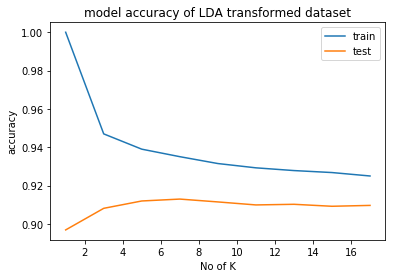

In [16]:
X_train = d2.iloc[:,0:9]
y_train = d2.label

X_test = test.iloc[:,0:784]/255.0
y_test = test["label"]

col_names = [ 'lda'+str(i) for i in range(0,9) ]
X_test = pd.DataFrame(lda.transform(X_test), columns = col_names)

train_accuracy = list()
test_accuracy = list()
noOfK = list()
for i in range(1, 19, 2):
    mod = KNeighborsClassifier(n_neighbors=i)
    mod.fit(X_train, y_train)
    y_train_pred = mod.predict(X_train)
    y_test_pred = mod.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_true=y_train,y_pred=y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_true=y_test,y_pred=y_test_pred))
    noOfK.append(i)
    
LDAKnnDf = pd.DataFrame({'K':noOfK,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
       
plt.plot(LDAKnnDf['K'],LDAKnnDf['train_accuracy'])
plt.plot(LDAKnnDf['K'],LDAKnnDf['test_accuracy'])
plt.title('model accuracy of LDA transformed dataset')
plt.ylabel('accuracy')
plt.xlabel('No of K')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [17]:
LDAKnnDf.head(10)

,K,test_accuracy,train_accuracy
0,1,0.896907,1.000000
1,3,0.908165,0.946993
2,5,0.912000,0.939021
3,7,0.912990,0.935105
4,9,0.911505,0.931524
5,11,0.909938,0.929287
6,13,0.910268,0.927860
7,15,0.909237,0.926825
8,17,0.909691,0.925035


### Parzen Window Classifier

Build Parzen window classifier with:<br>
¤ Sigma = 0.1, 0.2, 0.3, …, 3.0<br>
¤ Plot training and test accuracies with these values of sigma.

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors.kde import KernelDensity

class ParzenWindowClassifier(BaseEstimator, ClassifierMixin):
    """Parzen Window classification
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]

##### Build Parzen Window model for PCA transformed dataset

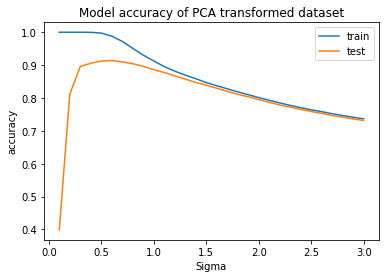

In [19]:
X_train = d1.iloc[:,0:9]
y_train = d1.label

X_test = test.iloc[:,0:784]/255.0
y_test = test["label"]

col_names = [ 'pca'+str(i) for i in range(0,9) ]
X_test = pd.DataFrame(pca.transform(X_test), columns = col_names)

train_accuracy = list()
test_accuracy = list()
bandWidths = list()
for i in np.arange(0.1,3.1,0.1):
    mod = ParzenWindowClassifier(bandwidth=i)
    mod.fit(X_train, y_train)
    y_train_pred = mod.predict(X_train)
    y_test_pred = mod.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_true=y_train,y_pred=y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_true=y_test,y_pred=y_test_pred))
    bandWidths.append(i)
    
PCAParzenDf = pd.DataFrame({'Sigma':bandWidths,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
       
plt.plot(PCAParzenDf['Sigma'],PCAParzenDf['train_accuracy'])
plt.plot(PCAParzenDf['Sigma'],PCAParzenDf['test_accuracy'])
plt.title('Model accuracy of PCA transformed dataset')
plt.ylabel('accuracy')
plt.xlabel('Sigma')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [20]:
PCAParzenDf.head(n=50)

,Sigma,test_accuracy,train_accuracy
0,0.1,0.398639,1.000000
1,0.2,0.811711,1.000000
2,0.3,0.895918,1.000000
3,0.4,0.905485,0.999692
4,0.5,0.912330,0.997566
5,0.6,0.913938,0.988168
6,0.7,0.909856,0.972168
7,0.8,0.904495,0.951049
8,0.9,0.896124,0.930210
9,1.0,0.886268,0.912643


##### Build Parzen Window model for LDA transformed dataset

/Users/a5sharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


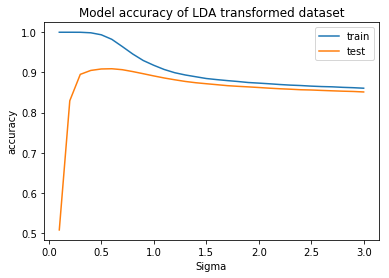

In [21]:
X_train = d2.iloc[:,0:9]
y_train = d2.label

X_test = test.iloc[:,0:784]/255.0
y_test = test["label"]

col_names = [ 'lda'+str(i) for i in range(0,9) ]
X_test = pd.DataFrame(lda.transform(X_test), columns = col_names)

train_accuracy = list()
test_accuracy = list()
bandWidths = list()
for i in np.arange(0.1,3.1,0.1):
    mod = ParzenWindowClassifier(bandwidth=i)
    mod.fit(X_train, y_train)
    y_train_pred = mod.predict(X_train)
    y_test_pred = mod.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_true=y_train,y_pred=y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_true=y_test,y_pred=y_test_pred))
    bandWidths.append(i)
    
LDAParzenDf = pd.DataFrame({'Sigma':bandWidths,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
       
plt.plot(LDAParzenDf['Sigma'],LDAParzenDf['train_accuracy'])
plt.plot(LDAParzenDf['Sigma'],LDAParzenDf['test_accuracy'])
plt.title('Model accuracy of LDA transformed dataset')
plt.ylabel('accuracy')
plt.xlabel('Sigma')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
LDAParzenDf.head(n=50)

,Sigma,test_accuracy,train_accuracy
0,0.1,0.508041,1.000000
1,0.2,0.829526,1.000000
2,0.3,0.895175,0.999916
3,0.4,0.904948,0.998629
4,0.5,0.908577,0.993678
5,0.6,0.909155,0.982434
6,0.7,0.906804,0.964448
7,0.8,0.902103,0.945790
8,0.9,0.896784,0.929650
9,1.0,0.891299,0.917762


##### Comment on the optimal k and optimal sigma and compare  those classifiers across D1 and D2 and see which one has  highest test accuracy.

From the above plots and dataframe, following are optimal k and sigma:

###### Model 1: PCA transformation (D1 dataset) + KNN 
    k = 9
    Test Accuracy = 0.915052
    Train Accuracy = 0.928727
    
###### Model 2: LDA transformation (D2 dataset) + KNN 
    k = 7
    Test Accuracy = 0.912990
    Train Accuracy = 0.935105
    
###### Model 3: PCA transformation (D1 dataset) + Parzen Window 
    sigma(bandwidth) = 0.6
    Test Accuracy = 0.913938
    Train Accuracy = 0.988168
    
###### Model 3: LDA transformation (D2 dataset) + Parzen Window 
    sigma(bandwidth) = 0.6
    Test Accuracy = 0.909155
    Train Accuracy = 0.982434
    
All above models are giving approximate similar accuracy for testing dataset. But, model 1 accuracy is slighly higher than other models.